In [2]:
import matplotlib.image as mpimg 
import os 
import graphviz
import pydot
import tensorflow as tf 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.models import Sequential 
from keras import layers ,models
from tensorflow import keras 
from tensorflow.keras.layers.experimental.preprocessing import Rescaling 
from sklearn.model_selection import train_test_split 
  
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np 
from glob import glob 
import cv2 
  
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
label_file = pd.read_csv('labels.csv')
label_file

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [4]:
label_file['Name'][0]

'Speed limit (5km/h)'

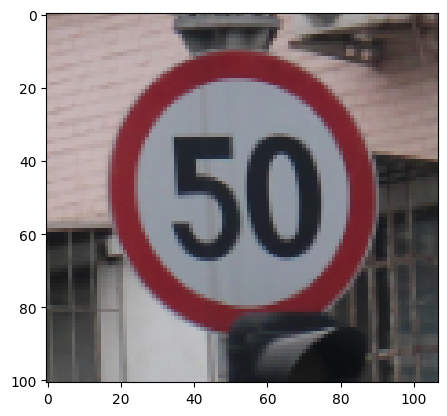

In [5]:
img=cv2.imread(r"D:\User Data ( Do Not Delete )\Desktop\AI-ML\Jupyter notebooks\Traffic_sign\traffic_Data\DATA\4\004_1_0001.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
path = r"D:\User Data ( Do Not Delete )\Desktop\AI-ML\Jupyter notebooks\Traffic_sign\traffic_Data\DATA"
tpath = r"D:\User Data ( Do Not Delete )\Desktop\AI-ML\Jupyter notebooks\Traffic_sign\traffic_Data"

In [7]:
df_train = image_dataset_from_directory(path, validation_split=0.2, labels ='inferred',subset = "training",image_size=(224,224),batch_size=32, seed=42)

df_validatation = image_dataset_from_directory(path,validation_split=0.2, labels ='inferred',subset = "validation",image_size=(224,224),batch_size=32, seed=42)



Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [8]:
df_train.class_names.sort()
print(df_train.class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '6', '7', '8', '9']


In [9]:
class_index =df_train.class_names
print(class_index)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '6', '7', '8', '9']


In [10]:
class_names=[]
for i in class_index:
    class_names.append(label_file['Name'][int(i)])
print(class_names)

['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (30km/h)', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn', 'Speed limit (40km/h)', 'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals', 'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing', 'Children crossing', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Speed limit (50km/h)', 'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight', 'Go left or straight', 'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction', 'Unknown5', 'Speed limit (60km/h)', 'Fences', 'Heavy Vehicle Accidents', 'Unknown6', 'Give Way', 'No stopping', 'No entry', 'Unknown7', 'Unknown8', 'Speed limit (70km/h)', 'spe

tf.Tensor(
[45 19 24 51  9 23 23 33 19  3 48 38 55 48 25  2  5  3 29  6 29 24 23 21
 13  6 21  6 45 21 29 23], shape=(32,), dtype=int32)


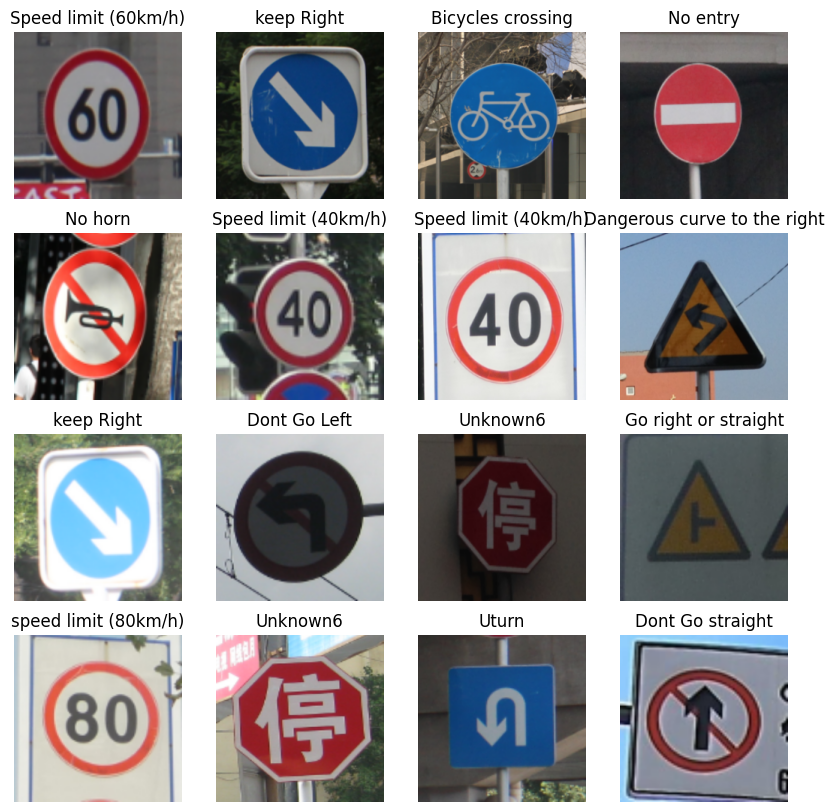

In [11]:
plt.figure(figsize=(10, 10))
for images,labels in df_train.take(1):
    print(labels)
    for i in range(16):

        ax = plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
plt.show()
    

In [12]:
data_augementation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
        tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
        
    
])

In [118]:
# input = Input(shape=(224,224,3))

# x = data_augementation(input)
# x = Rescaling(1./255)(x)

# x = Conv2D(filters =64,kernel_size=(3,3),padding='same',activation='relu')(x)

# x = Conv2D(filters =64,kernel_size=(3,3),padding='same',activation='relu')(x)
# x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)
# # 2nd Conv block
# x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
# x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
# x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)
# # 3rd Conv block

# x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
# x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
# x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
# x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)
# # 4th Conv block

# x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
# x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
# x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
# x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)

# # 5th Conv block

# x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
# x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
# x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
# x = MaxPooling2D(pool_size =2, strides =2, padding ='same')(x)
# # Fully connected layers

# x = Flatten()(x)
# x = Dense(units = 4096, activation ='relu')(x)
# x = Dense(units = 4096, activation ='relu')(x)
# output = Dense(units = 1000, activation ='softmax')(x)
# # creating the model

# model = tf.keras.Model(inputs=input, outputs =output)
# model.summary()




In [119]:
# tf.keras.utils.plot_model(model,show_shapes=True, show_layer_names=True, show_layer_activations=True,show_dtype=True, to_file='model.png')

In [120]:
# model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='Adam',metrics=['accuracy'])

In [121]:
# history = model.fit(df_train,validation_data=df_validatation,epochs=50)

In [122]:
# model = Sequential() 
# model.add(data_augementation) 
# model.add(Rescaling(1./255)) 
# model.add(Conv2D(128, (3, 3), activation='relu',padding ='same')) 
# model.add(MaxPooling2D((2, 2))) 
# model.add(Conv2D(64, (3, 3), activation='relu',padding ='same')) 
# model.add(MaxPooling2D((2, 2))) 
# model.add(Conv2D(128, (3, 3), activation='relu',padding ='same')) 
# model.add(MaxPooling2D((2, 2))) 
# model.add(Conv2D(256, (3, 3), activation='relu',padding ='same')) 
# model.add(MaxPooling2D((2, 2),padding ='same')) 
# model.add(Flatten()) 
# model.add(Dense(64, activation='relu')) 
# model.add(Dropout(0.2)) 
# model.add(Dense(128, activation='relu')) 
# model.add(Dense(len(label_file), activation='softmax')) 
# model.build(input_shape=(None, 224, 224, 3))

In [123]:
# model.summary()

In [124]:
# model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='Adam',metrics=['accuracy'])

In [125]:
# mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
# history = model.fit(df_train,validation_data=df_validatation,epochs=50,callbacks=mycallbacks)

In [126]:
vgg16 = VGG16(include_top = False, input_shape = (224,224,3))
for layer in vgg16.layers:
    layer.trainable = False
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [127]:
# vgg16.compile(loss = "categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
# history = vgg16.fit(df_train,validation_data=df_validatation,epochs=50,callbacks=callback)


In [128]:
flatten_layer = layers.Flatten()
# dense_layer_1 = layers.Dense(256, activation='relu')
# dense_layer_2 = layers.Dense(128, activation='relu')
prediction_layer = layers.Dense(len(label_file), activation='softmax')

In [129]:
model = models.Sequential([
    data_augementation,
    vgg16,
    flatten_layer,
    # dense_layer_1,
    # dense_layer_2,
    prediction_layer
])
model.build(input_shape=(None, 224, 224, 3))


In [130]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 58)                1455162   
                                                                 
Total params: 16169850 (61.68 MB)
Trainable params: 1455162 (5.55 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [131]:
# data_gen = ImageDataGenerator(zoom_range=0.5, shear_range=0.8, horizontal_flip=True, rescale=1/255)
# data_gen =data_gen.flow_from_directory(
#     directory=path,
#     target_size=(224,224),
#     batch_size=3,
#     class_mode="categorical",
#     )

In [132]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

In [133]:
history = model.fit(df_train,validation_data=df_validatation,epochs=5,callbacks=callback)


Epoch 1/5


105/105 [==============================] - 349s 3s/step - loss: 5.7593 - accuracy: 0.8432 - val_loss: 1.2184 - val_accuracy: 0.9604
Epoch 2/5
105/105 [==============================] - 334s 3s/step - loss: 0.2553 - accuracy: 0.9835 - val_loss: 0.4725 - val_accuracy: 0.9712
Epoch 3/5
105/105 [==============================] - 341s 3s/step - loss: 0.1031 - accuracy: 0.9931 - val_loss: 0.1878 - val_accuracy: 0.9856
Epoch 4/5
105/105 [==============================] - 341s 3s/step - loss: 0.0589 - accuracy: 0.9961 - val_loss: 0.2838 - val_accuracy: 0.9868
Epoch 5/5
105/105 [==============================] - 343s 3s/step - loss: 0.0716 - accuracy: 0.9967 - val_loss: 0.2300 - val_accuracy: 0.9856


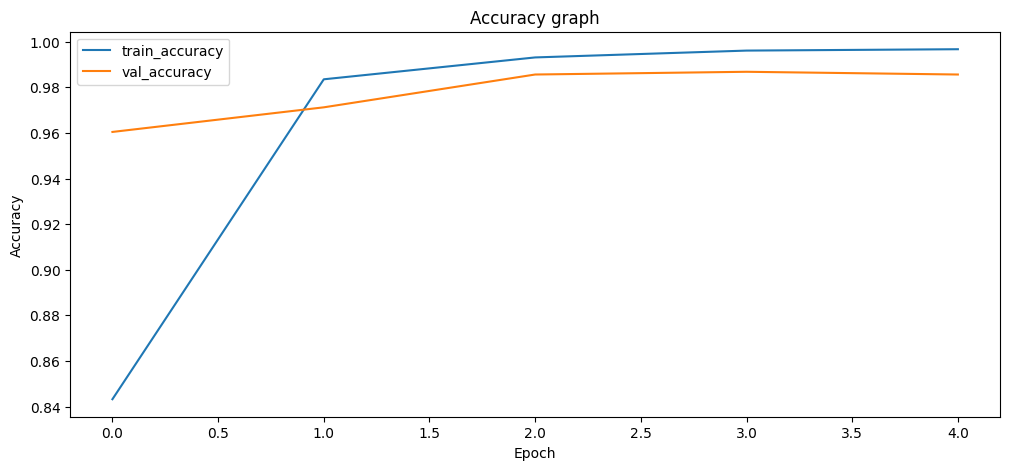

In [134]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 112ms/step
Class name: Speed limit (40km/h)


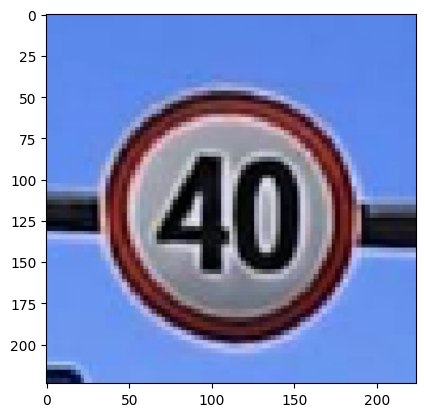

In [153]:

img_path = r"D:\User Data ( Do Not Delete )\Desktop\AI-ML\Jupyter notebooks\Traffic_sign\traffic_Data\TEST\003_1_0025_1_j.png"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = x/255.0
prediction = model.predict(x)
print("Class name:", class_names[np.argmax(prediction)])
plt.imshow(img)